# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20. You don't need to change any code in the following cell, just run it.

In [195]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import StandardScaler

# Common imports
import numpy as np
import os
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 3. Read the dataset 

In [33]:
# fields are separated by comma and skip the first row (titles) when reading
data = np.loadtxt("hw03_data.txt", skiprows=1, dtype="float", delimiter=",")

# Separate features and target
X = data[:, [0]]
y = data[:, [1]]

# create instance of StandardScaler
scaler = sklearn.preprocessing.StandardScaler()

# Fit and scale the data
scaled_data = scaler.fit_transform(data)

# Designate scaled and unscaled X/y values
X = scaled_data[:, [0]]
y = scaled_data[:, [1]]
X_unscaled = data[:, [0]]
y_unscaled = data[:, [1]]


# 4. Visualize the dataset

Saving figure generated_data_plot


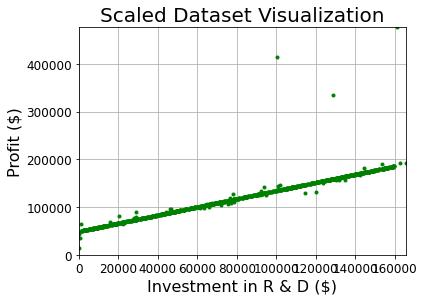

In [60]:
plt.plot(X_unscaled, y_unscaled, "g.")
plt.xlabel("Investment in R & D ($)", fontsize=16)
plt.ylabel("Profit ($)", rotation=90, fontsize=16)
plt.axis([0, max(X_unscaled), 0, max(y_unscaled)])
save_fig("generated_data_plot")
plt.title("Scaled Dataset Visualization", fontsize=20)
plt.grid(True)
plt.show()


# 5. Training with scikit_learn Linear Regression 



In [77]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# a. Splitting the dataset into the Training set (80%) and Test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# Fitting Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression

# b. Fit the training data to the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

# c. Calculating the Intercept and the Coefficient
intercept = lin_reg.intercept_[0]
coefficient = lin_reg.coef_[0][0]
print("Intercept:", intercept)
print("Coefficient:", coefficient)

Intercept: -0.0011548333575354423
Coefficient: 0.9442141523225853


# 5.d Prediction
Now we can make predictions using the weights.

In [81]:
# d. Predict and print the Test set results
y_pred = lin_reg.predict(X_test)
print("Test set predictions:", y_pred)

Test set predictions: [[ 0.12876307]
 [-0.18041772]
 [-0.65296841]
 [ 0.19000648]
 [ 1.00174053]
 [-0.65128355]
 [ 0.83644218]
 [ 0.469002  ]
 [-0.74127097]
 [-0.65846955]
 [ 1.15341795]
 [ 1.0427454 ]
 [-0.33329281]
 [-0.26484309]
 [-0.64695977]
 [ 0.95990338]
 [-0.0612397 ]
 [-0.34908577]
 [ 0.02639299]
 [-0.32543693]
 [-1.03139059]
 [ 0.15257431]
 [-1.27526807]
 [-1.16088072]
 [ 1.20735357]
 [ 1.07006845]
 [ 1.39287016]
 [ 0.37917697]
 [ 0.07285841]
 [ 1.02015212]
 [ 0.61542187]
 [-0.14178788]
 [ 1.09942144]
 [ 0.52805307]
 [-1.27471998]
 [-0.71764243]
 [-0.87979436]
 [-1.06447867]
 [-0.06154419]
 [ 1.20510033]
 [-1.38963512]
 [-0.71618087]
 [ 0.05440621]
 [ 0.53448799]
 [ 1.1663081 ]
 [ 0.66710424]
 [ 0.78510489]
 [ 0.45556377]
 [ 0.5305905 ]
 [-1.05802345]
 [-0.1157031 ]
 [-1.33823694]
 [ 1.23640207]
 [ 1.36615609]
 [-0.28811579]
 [-0.40053511]
 [ 1.44167001]
 [ 0.40979015]
 [ 0.06274928]
 [-1.21463364]
 [-0.0139014 ]
 [-0.69021788]
 [ 1.49927983]
 [-1.36527579]
 [ 1.41863015]
 [-

# 5.e Evaluation
Best possible $R^{2}$ score  is 1.0. <br>

In [92]:
# Calculating the R squared value

# r2_score(y_test, y_pred) 

# e. Calculate and print the R squared value
r2 = r2_score(y_test, y_pred)
print("R squared value:", r2)

R squared value: 0.9134554891584079


# 6.Linear regression using gradient descent
Solve the same problem with gradient descent algorithm

In [124]:
#a. Training the model with training data.
alpha = 0.2  # learning rate
n_iterations = 1000
m = len(X_train)

weight = np.random.randn(2, 1)  # random initialization
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]

# Gradient Descent with gradient clipping
max_gradient_norm = 1.0  # You can adjust this threshold

for iteration in range(n_iterations):
    gradients = 2/m * X_train_b.T.dot(X_train_b.dot(weight) - y_train)
    clipped_gradients = np.clip(gradients, -max_gradient_norm, max_gradient_norm)
    weight = weight - alpha * clipped_gradients

#b. Print the final intercept and coefficients
intercept = weight[0][0]
coefficient = weight[1][0]
print("Final Intercept:", intercept)
print("Final Coefficient:", coefficient)

Final Intercept: -0.0011548333575354152
Final Coefficient: 0.9442141523225851


Print out the weight values

In [128]:
# Print the weights
print(weight)

[[-0.00115483]
 [ 0.94421415]]


In [134]:
# c. Predict and print the Test set results
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred = X_test_b.dot(weight)

print("Test set predictions:", y_pred)

Test set predictions: [[ 0.12876307]
 [-0.18041772]
 [-0.65296841]
 [ 0.19000648]
 [ 1.00174053]
 [-0.65128355]
 [ 0.83644218]
 [ 0.469002  ]
 [-0.74127097]
 [-0.65846955]
 [ 1.15341795]
 [ 1.0427454 ]
 [-0.33329281]
 [-0.26484309]
 [-0.64695977]
 [ 0.95990338]
 [-0.0612397 ]
 [-0.34908577]
 [ 0.02639299]
 [-0.32543693]
 [-1.03139059]
 [ 0.15257431]
 [-1.27526807]
 [-1.16088072]
 [ 1.20735357]
 [ 1.07006845]
 [ 1.39287016]
 [ 0.37917697]
 [ 0.07285841]
 [ 1.02015212]
 [ 0.61542187]
 [-0.14178788]
 [ 1.09942144]
 [ 0.52805307]
 [-1.27471998]
 [-0.71764243]
 [-0.87979436]
 [-1.06447867]
 [-0.06154419]
 [ 1.20510033]
 [-1.38963512]
 [-0.71618087]
 [ 0.05440621]
 [ 0.53448799]
 [ 1.1663081 ]
 [ 0.66710424]
 [ 0.78510489]
 [ 0.45556377]
 [ 0.5305905 ]
 [-1.05802345]
 [-0.1157031 ]
 [-1.33823694]
 [ 1.23640207]
 [ 1.36615609]
 [-0.28811579]
 [-0.40053511]
 [ 1.44167001]
 [ 0.40979015]
 [ 0.06274928]
 [-1.21463364]
 [-0.0139014 ]
 [-0.69021788]
 [ 1.49927983]
 [-1.36527579]
 [ 1.41863015]
 [-

In [154]:
# d. Calculate and print the R squared value

r2 = r2_score(y_test, y_pred)
print("R squared value:", r2)

R squared value: 0.9134554891584079


# Improve $R^{2}$ Value

**Reason:** The R-squared value measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) in a regression model. A high R-squared value indicates that a large proportion of the variance in the target variable can be explained by the independent variables, which is generally desirable in regression analysis.

In [198]:
# Normalize the data
normalized_data = sklearn.preprocessing.normalize(scaled_data, norm='l1')
X_norm = normalized_data[:, [0]]
y_norm = normalized_data[:, [1]]

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_norm, y_norm, test_size = 0.2, random_state = 42)
weight = np.random.randn(2,1)  
X_train_b_n = np.c_[np.ones((800, 1)), X_train_n]
# Set the learning rate
alpha = 0.1

#Iterations
n_iterations = 1000
m = len(X_train_b_n)

# Running for iterations
for iteration in range(n_iterations):
    # Calulate the gradients
    gradients = 1/m * X_train_b_n.T.dot(X_train_b_n.dot(weight) - y_train_n)
    weight = weight - alpha * gradients
X_test_b_n = np.c_[np.ones((200, 1)), X_test_n]
y_predict_n = X_test_b_n.dot(weight)

# Calulcate the score
# print(sklearn.metrics.r2_score(y_test_n, y_predict_n))
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)


R-squared value: 0.9134554891584079
